In [154]:
import pandas as pd
import numpy as np


In [155]:
gameplay_df = pd.read_csv('User Gameplay data.csv',skiprows=3, low_memory=False)
deposit_df = pd.read_csv('Deposit Data.csv',skiprows=3, low_memory=False)
withdrawal_df = pd.read_csv('Withdrawal Data.csv',skiprows=3, low_memory=False)


In [156]:
print(gameplay_df.head(30))
print(deposit_df.head(30))
print(withdrawal_df.head(30))


    User ID  Games Played         Datetime
0       851             1  01-10-2022 0:00
1       717             1  01-10-2022 0:00
2       456             1  01-10-2022 0:00
3       424             1  01-10-2022 0:00
4       845             1  01-10-2022 0:00
5        15             1  01-10-2022 0:00
6       738             1  01-10-2022 0:00
7       748             1  01-10-2022 0:01
8       582             1  01-10-2022 0:01
9        39             1  01-10-2022 0:01
10      564             1  01-10-2022 0:01
11      996             1  01-10-2022 0:01
12      146             1  01-10-2022 0:02
13      458             1  01-10-2022 0:02
14       39             1  01-10-2022 0:02
15      247             1  01-10-2022 0:02
16      137             1  01-10-2022 0:02
17      618             1  01-10-2022 0:02
18      754             1  01-10-2022 0:02
19      365             1  01-10-2022 0:02
20      377             1  01-10-2022 0:02
21      456             1  01-10-2022 0:03
22      922

In [157]:
gameplay_df.info()
deposit_df.info()
withdrawal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355266 entries, 0 to 355265
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   User ID       355266 non-null  int64 
 1   Games Played  355266 non-null  int64 
 2   Datetime      355266 non-null  object
dtypes: int64(2), object(1)
memory usage: 8.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17438 entries, 0 to 17437
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User Id   17438 non-null  int64 
 1   Datetime  17438 non-null  object
 2   Amount    17438 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 408.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3566 entries, 0 to 3565
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User Id   3566 non-null   int64 
 1   Datetime  3566 non-null   object
 2   Amount    35

In [158]:
gameplay_df[['Date', 'Time']] = gameplay_df['Datetime'].str.split(' ', expand=True)
deposit_df[['Date', 'Time']] = deposit_df['Datetime'].str.split(' ', expand=True)
withdrawal_df[['Date', 'Time']] = withdrawal_df['Datetime'].str.split(' ', expand=True)

In [159]:
gameplay_df['Hour'] = gameplay_df['Time'].str.split(':').str[0].astype(int)
deposit_df['Hour'] = deposit_df['Time'].str.split(':').str[0].astype(int)
withdrawal_df['Hour'] = withdrawal_df['Time'].str.split(':').str[0].astype(int)

In [160]:
gameplay_df['Slot'] = gameplay_df['Hour'].apply(lambda x: 'S1' if x < 12 else 'S2')
deposit_df['Slot'] = deposit_df['Hour'].apply(lambda x: 'S1' if x < 12 else 'S2')
withdrawal_df['Slot'] = withdrawal_df['Hour'].apply(lambda x: 'S1' if x < 12 else 'S2')

In [161]:
print(gameplay_df.head())
print(deposit_df.head())
print(withdrawal_df.head())


   User ID  Games Played         Datetime        Date  Time  Hour Slot
0      851             1  01-10-2022 0:00  01-10-2022  0:00     0   S1
1      717             1  01-10-2022 0:00  01-10-2022  0:00     0   S1
2      456             1  01-10-2022 0:00  01-10-2022  0:00     0   S1
3      424             1  01-10-2022 0:00  01-10-2022  0:00     0   S1
4      845             1  01-10-2022 0:00  01-10-2022  0:00     0   S1
   User Id         Datetime  Amount        Date  Time  Hour Slot
0      357  01-10-2022 0:03    2000  01-10-2022  0:03     0   S1
1      776  01-10-2022 0:03    2500  01-10-2022  0:03     0   S1
2      492  01-10-2022 0:06    5000  01-10-2022  0:06     0   S1
3      803  01-10-2022 0:07    5000  01-10-2022  0:07     0   S1
4      875  01-10-2022 0:09    1500  01-10-2022  0:09     0   S1
   User Id         Datetime  Amount        Date  Time  Hour Slot
0      190  01-10-2022 0:03    5872  01-10-2022  0:03     0   S1
1      159  01-10-2022 0:16    9540  01-10-2022  0:16 

In [162]:
print(gameplay_df.tail())
print(deposit_df.tail())
print(withdrawal_df.tail())


        User ID  Games Played          Datetime        Date   Time  Hour Slot
355261      658             1  31-10-2022 23:59  31-10-2022  23:59    23   S2
355262      582             1  31-10-2022 23:59  31-10-2022  23:59    23   S2
355263      272             1  31-10-2022 23:59  31-10-2022  23:59    23   S2
355264      563             1  31-10-2022 23:59  31-10-2022  23:59    23   S2
355265      289             1  31-10-2022 23:59  31-10-2022  23:59    23   S2
       User Id          Datetime  Amount        Date   Time  Hour Slot
17433      654  31-10-2022 23:57    1200  31-10-2022  23:57    23   S2
17434      980  31-10-2022 23:58     200  31-10-2022  23:58    23   S2
17435        2  31-10-2022 23:58   40000  31-10-2022  23:58    23   S2
17436      612  31-10-2022 23:58    2800  31-10-2022  23:58    23   S2
17437      786  31-10-2022 23:59   20000  31-10-2022  23:59    23   S2
      User Id          Datetime  Amount        Date   Time  Hour Slot
3561      559  31-10-2022 23:27    5

In [163]:
gameplay_df = gameplay_df.drop(columns=['Hour'])
deposit_df = deposit_df.drop(columns=['Hour'])
withdrawal_df = withdrawal_df.drop(columns=['Hour'])


In [164]:
gameplay_df['Date'] = pd.to_datetime(gameplay_df['Date'], format='%d-%m-%Y', dayfirst=True)
gameplay_df['Time'] = pd.to_timedelta(gameplay_df['Time'] + ':00')
deposit_df['Date'] = pd.to_datetime(deposit_df['Date'], format='%d-%m-%Y', dayfirst=True)
deposit_df['Time'] = pd.to_timedelta(deposit_df['Time'] + ':00')
withdrawal_df['Date'] = pd.to_datetime(withdrawal_df['Date'], format='%d-%m-%Y', dayfirst=True)
withdrawal_df['Time'] = pd.to_timedelta(withdrawal_df['Time'] + ':00')

In [165]:
gameplay_df.info()
deposit_df.info()
withdrawal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355266 entries, 0 to 355265
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   User ID       355266 non-null  int64          
 1   Games Played  355266 non-null  int64          
 2   Datetime      355266 non-null  object         
 3   Date          355266 non-null  datetime64[ns] 
 4   Time          355266 non-null  timedelta64[ns]
 5   Slot          355266 non-null  object         
dtypes: datetime64[ns](1), int64(2), object(2), timedelta64[ns](1)
memory usage: 16.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17438 entries, 0 to 17437
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   User Id   17438 non-null  int64          
 1   Datetime  17438 non-null  object         
 2   Amount    17438 non-null  int64          
 3   Date      17438 non-null  datetime64

In [166]:
deposit_df.rename(columns={'Amount': 'deposit_amount'},inplace="True")

withdrawal_df.rename(columns={'Amount': 'withdrawal_amount'},inplace="True")
gameplay_df.rename(columns={'User ID': 'User_Id'},inplace="True")
deposit_df.rename(columns={'User Id': 'User_Id'},inplace="True")
withdrawal_df.rename(columns={'User Id': 'User_Id'},inplace="True")
gameplay_df.rename(columns={'Games Played': 'games_played'},inplace="True")

In [167]:
gameplay_df.info()
deposit_df.info()

withdrawal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355266 entries, 0 to 355265
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   User_Id       355266 non-null  int64          
 1   games_played  355266 non-null  int64          
 2   Datetime      355266 non-null  object         
 3   Date          355266 non-null  datetime64[ns] 
 4   Time          355266 non-null  timedelta64[ns]
 5   Slot          355266 non-null  object         
dtypes: datetime64[ns](1), int64(2), object(2), timedelta64[ns](1)
memory usage: 16.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17438 entries, 0 to 17437
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   User_Id         17438 non-null  int64          
 1   Datetime        17438 non-null  object         
 2   deposit_amount  17438 non-null  int64          
 3   Date  

In [168]:
def calculate_deposit_points(deposit_amount):
    return 0.01 * deposit_amount

def calculate_withdrawal_points(withdrawal_amount):
    return 0.005 * withdrawal_amount

def calculate_deposit_vs_withdrawal(deposits, withdrawals):
    return 0.001 * max(deposits - withdrawals, 0)

def calculate_game_points(games_played):
    return 0.2 * games_played


In [169]:
def calculate_loyalty_points(deposit_amount, withdrawal_amount, deposits, withdrawals, games_played):
    return (calculate_deposit_points(deposit_amount) +
            calculate_withdrawal_points(withdrawal_amount) +
            calculate_deposit_vs_withdrawal(deposits, withdrawals) +
            calculate_game_points(games_played))


In [170]:

dates_slots = [
    ('02-10-2023', 'S1'),
    ('16-10-2023', 'S2'),
    ('18-10-2023', 'S1'),
    ('26-10-2023', 'S2')
]


In [171]:
all_results = []


for date, slot in dates_slots:
    
    gameplay_filtered = gameplay_df[(gameplay_df['Date'] == date) & (gameplay_df['Slot'] == slot)]
    deposit_filtered = deposit_df[(deposit_df['Date'] == date) & (deposit_df['Slot'] == slot)]
    withdrawal_filtered = withdrawal_df[(withdrawal_df['Date'] == date) & (withdrawal_df['Slot'] == slot)]

In [172]:

gameplay_filtered['Game Points'] = gameplay_filtered['games_played'].apply(calculate_game_points)

    
deposit_filtered['Deposit Points'] = deposit_filtered['deposit_amount'].apply(calculate_deposit_points)

    
withdrawal_filtered['Withdrawal Points'] = withdrawal_filtered['withdrawal_amount'].apply(calculate_withdrawal_points)

    
deposit_counts = deposit_filtered.groupby('User_Id').size().reset_index(name='deposits')
withdrawal_counts = withdrawal_filtered.groupby('User_Id').size().reset_index(name='withdrawals')


In [173]:
merged_df = gameplay_filtered[['User_Id', 'Game Points']].merge(
        deposit_filtered[['User_Id', 'Deposit Points']], on='User_Id', how='outer'
    ).merge(
        withdrawal_filtered[['User_Id', 'Withdrawal Points']], on='User_Id', how='outer'
    ).merge(
        deposit_counts, on='User_Id', how='outer'
    ).merge(
        withdrawal_counts, on='User_Id', how='outer'
    ).fillna(0)

In [174]:
merged_df['Loyalty Points'] = merged_df.apply(
        lambda row: calculate_loyalty_points(
            row['Deposit Points'], row['Withdrawal Points'],
            row['deposits'], row['withdrawals'], row['Game Points']
        ), axis=1
    )

    
merged_df['Date'] = date
merged_df['Slot'] = slot

    
all_results.append(merged_df[['User_Id', 'Loyalty Points', 'Date', 'Slot']])

In [175]:
# Concatenate all results into one DataFrame
final_results_df = pd.concat(all_results, ignore_index=True)

# Display the final DataFrame with loyalty points for each specified date and slot
final_results_df.head()


,User_Id,Loyalty Points,Date,Slot


In [176]:
# Loop to display loyalty points for each date and slot
for date, slot in dates_slots:
    print(f"Loyalty Points for {date} Slot {slot}")
    print(final_results_df[(final_results_df['Date'] == date) & (final_results_df['Slot'] == slot)][['User_Id', 'Loyalty Points']])
    print("\n")


Loyalty Points for 02-10-2023 Slot S1
Empty DataFrame
Columns: [User_Id, Loyalty Points]
Index: []


Loyalty Points for 16-10-2023 Slot S2
Empty DataFrame
Columns: [User_Id, Loyalty Points]
Index: []


Loyalty Points for 18-10-2023 Slot S1
Empty DataFrame
Columns: [User_Id, Loyalty Points]
Index: []


Loyalty Points for 26-10-2023 Slot S2
Empty DataFrame
Columns: [User_Id, Loyalty Points]
Index: []




In [177]:
# Calculate total loyalty points for each player
total_loyalty_points = final_results_df.groupby('User_Id')['Loyalty Points'].sum().reset_index()

# Sort players based on loyalty points in descending order
total_loyalty_points = total_loyalty_points.sort_values(by='Loyalty Points', ascending=False)

# Display the top 50 players
top_50_players = total_loyalty_points.head(50)
print("Top 50 Players:")
print(top_50_players)


Top 50 Players:
Empty DataFrame
Columns: [User_Id, Loyalty Points]
Index: []


In [178]:
# Calculate the total loyalty points of the top 50 players
total_points_top_50 = top_50_players['Loyalty Points'].sum()
print("Total Loyalty Points of Top 50 Players:", total_points_top_50)


Total Loyalty Points of Top 50 Players: 0.0


In [179]:
# Allocate bonus based on loyalty points
total_bonus_pool = 50000

# Calculate individual bonuses
top_50_players['Bonus'] = (top_50_players['Loyalty Points'] / total_points_top_50) * total_bonus_pool

# Display the bonuses
print("Bonus Allocation for Top 50 Players:")
print(top_50_players[['User_Id', 'Loyalty Points', 'Bonus']])


Bonus Allocation for Top 50 Players:
Empty DataFrame
Columns: [User_Id, Loyalty Points, Bonus]
Index: []


In [180]:
# Save the results to a CSV file
top_50_players.to_csv('top_50_players_bonus.csv', index=False)


In [181]:
print("Bonus Allocation for Top 50 Players:")
print(top_50_players[['User_Id', 'Loyalty Points', 'Bonus']])

Bonus Allocation for Top 50 Players:
Empty DataFrame
Columns: [User_Id, Loyalty Points, Bonus]
Index: []


In [182]:
# Summary statistics for bonuses
average_bonus = top_50_players['Bonus'].mean()
max_bonus = top_50_players['Bonus'].max()
min_bonus = top_50_players['Bonus'].min()
total_bonus_distributed = top_50_players['Bonus'].sum()

# Print the summary statistics
print(f"Average Bonus: ₹{average_bonus:.2f}")
print(f"Maximum Bonus: ₹{max_bonus:.2f}")
print(f"Minimum Bonus: ₹{min_bonus:.2f}")
print(f"Total Bonus Distributed: ₹{total_bonus_distributed:.2f}")


Average Bonus: ₹nan
Maximum Bonus: ₹nan
Minimum Bonus: ₹nan
Total Bonus Distributed: ₹0.00


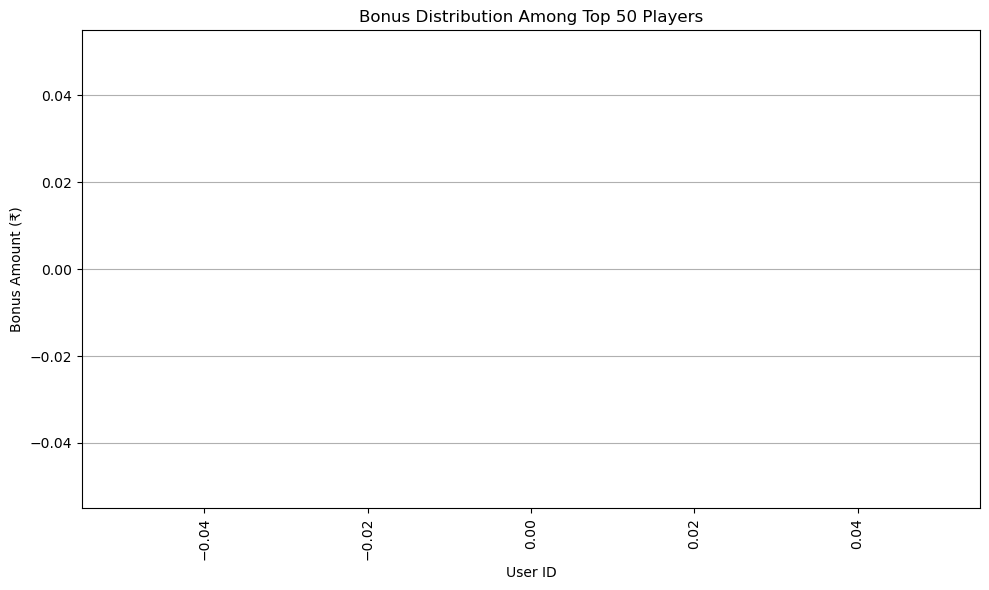

In [183]:

import matplotlib.pyplot as plt

# Plotting the bonus distribution
plt.figure(figsize=(10, 6))
plt.bar(top_50_players['User_Id'], top_50_players['Bonus'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Bonus Distribution Among Top 50 Players')
plt.xlabel('User ID')
plt.ylabel('Bonus Amount (₹)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
